# Boston Housing Dataset Machine Learning Practice

Here we firstly analyse the Boston Housing dataset to ensure it is ready to be used to create models, and then we experiment with many machine learning models to attempt to predict the housing prices. The aim here is not to try to make the best model, just to experiment with some available models.

In [492]:
import pandas as pd

In [494]:
df = pd.read_csv('BostonHousing.csv')

Make sure the data has been read correctly

In [496]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Have a look at the statistical properties of the data to get a feel for it

In [498]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We see there are some missing values and replace these with NANs

In [502]:
import numpy as np

df.replace('NA', np.nan, inplace = True)

In [504]:
missing_data = df.notnull()

In [506]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("") 

CRIM
True     486
False     20
Name: count, dtype: int64

ZN
True     486
False     20
Name: count, dtype: int64

INDUS
True     486
False     20
Name: count, dtype: int64

CHAS
True     486
False     20
Name: count, dtype: int64

NOX
True    506
Name: count, dtype: int64

RM
True    506
Name: count, dtype: int64

AGE
True     486
False     20
Name: count, dtype: int64

DIS
True    506
Name: count, dtype: int64

RAD
True    506
Name: count, dtype: int64

TAX
True    506
Name: count, dtype: int64

PTRATIO
True    506
Name: count, dtype: int64

B
True    506
Name: count, dtype: int64

LSTAT
True     486
False     20
Name: count, dtype: int64

MEDV
True    506
Name: count, dtype: int64



We have a look to see how many unique values there are for each variable, seeing chas has 2 shows it is categorical

In [508]:
print(df.nunique())

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64


In [510]:
df['CHAS'].value_counts()

CHAS
0.0    452
1.0     34
Name: count, dtype: int64

Since CHAS has the majority of its values as 0 we replace the missing values from that column with 0

In [512]:
chas_most_frequent = df['CHAS'].value_counts().idxmax()
df['CHAS'].replace(np.nan, chas_most_frequent, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_31256\603005709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CHAS'].replace(np.nan, chas_most_frequent, inplace = True)


For the other columns with missing values we replace them with the mean of each column

In [522]:
avg_crim = df['CRIM'].mean()
avg_zn = df['ZN'].mean()
avg_indus = df['INDUS'].mean()
avg_age = df['AGE'].mean()
avg_lstat = df['LSTAT'].mean()

df['CRIM'].replace(np.nan, avg_crim, inplace = True)
df['ZN'].replace(np.nan, avg_zn, inplace = True)
df['INDUS'].replace(np.nan, avg_indus, inplace = True)
df['AGE'].replace(np.nan, avg_age, inplace = True)
df['LSTAT'].replace(np.nan, avg_lstat, inplace = True)

C:\Users\aaron\AppData\Local\Temp\ipykernel_31256\547864421.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRIM'].replace(np.nan, avg_crim, inplace = True)
C:\Users\aaron\AppData\Local\Temp\ipykernel_31256\547864421.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

When we look again we can see there are no missing values now

In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [526]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In the description of the data it suggests using values of MEDV > 50 does not help / hinders prediction so we remove these from the data set

In [531]:
df = df[df['MEDV'] < 50]

#Exploratory Data Analysis
We now have do a little bit of EDA where we analyse some plots to see w
We have a look at CHAS with a boxplot to see if it has any affect on the house price, it has a bit of an overlap which suggests it's probably not the best predictor but we will look further at the correlation too

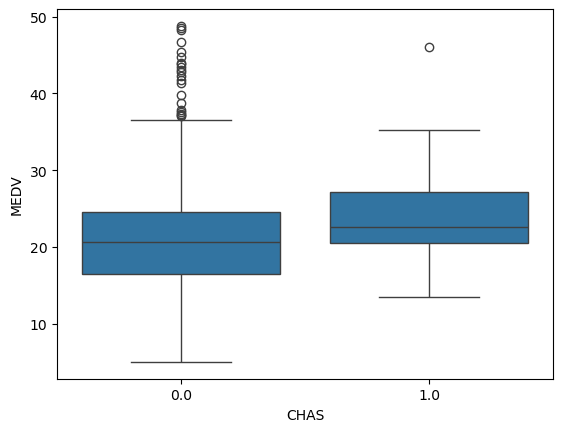

In [533]:
sns.boxplot(x = 'CHAS', y = 'MEDV', data = df)
plt.show()

We have a look at a heatmap to show the correlation for the variables, and a small value of a variable related to MEDV suggests it probably shouldn't be included in our model. We also see high correlations between certain variables for example, TAX and RAD have a correlation of 0.91. In this case we remove RAD since its correlation with MEDV is lower and we want to avoid multicollinearity in our data.

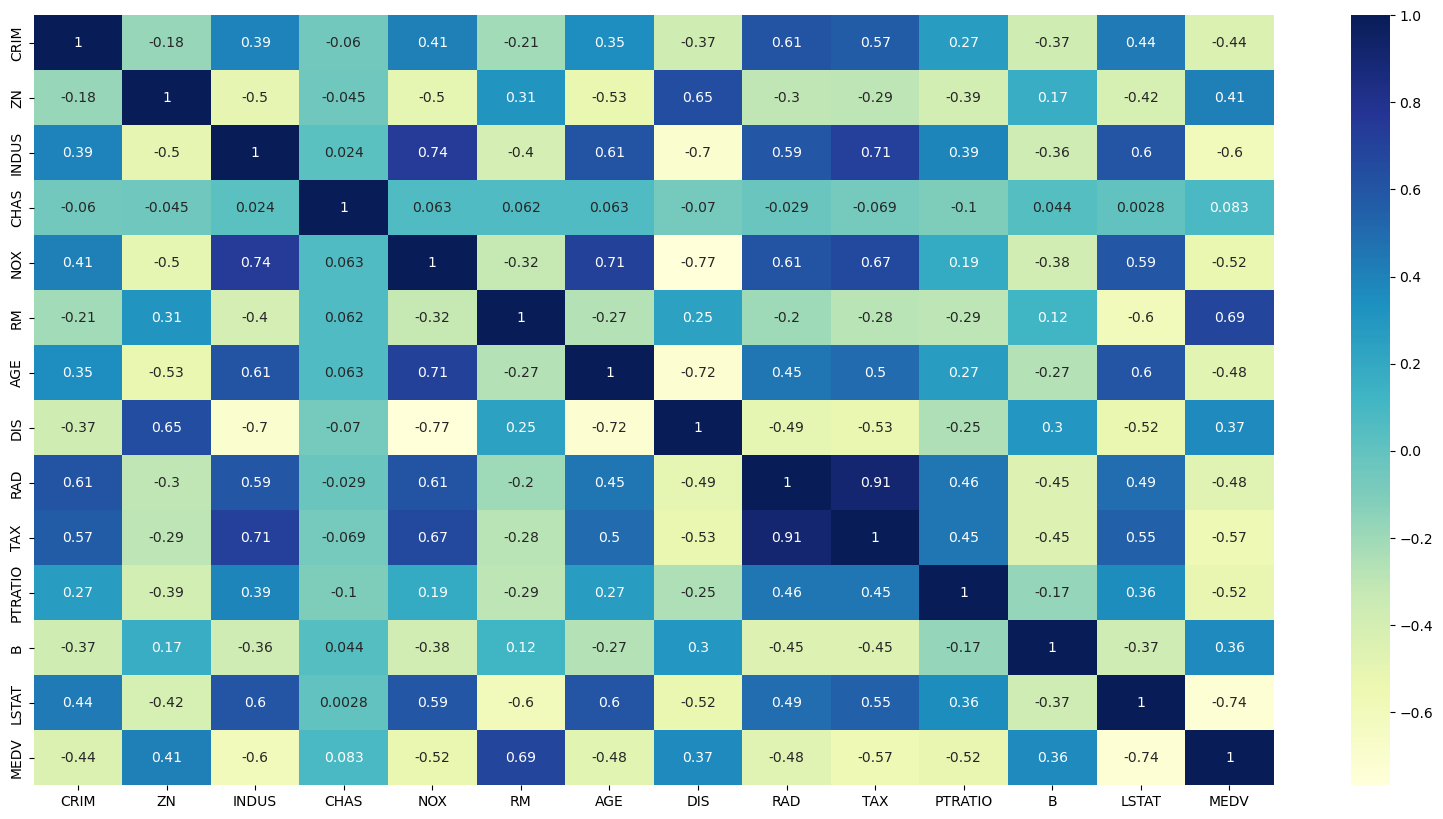

In [539]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Next we have a look at regression plots for all the variables against MEDV, along with their correlation coeficient and p-value to help us understand the data further.

In [541]:
from scipy import stats

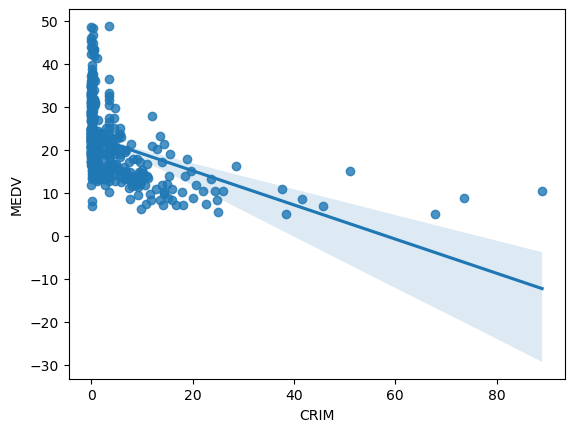

In [543]:
sns.regplot(x = 'CRIM', y = 'MEDV', data = df)
plt.show()

In [545]:
pearson_coef, p_value = stats.pearsonr(df['CRIM'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.438040969240191  with a P-value of P = 2.170000202207572e-24


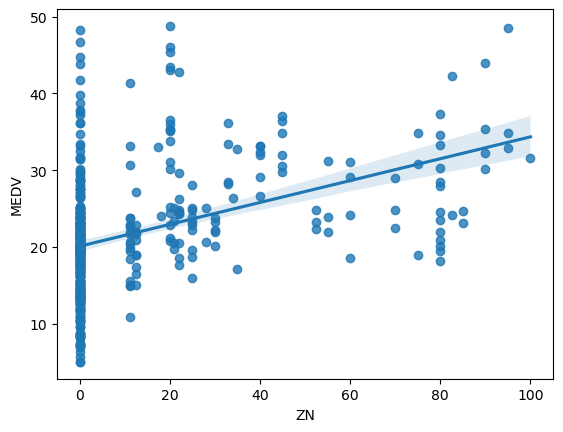

In [547]:
sns.regplot(x = 'ZN', y = 'MEDV', data = df)
plt.show()

In [549]:
pearson_coef, p_value = stats.pearsonr(df['ZN'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.4066914459704029  with a P-value of P = 6.093499856826062e-21


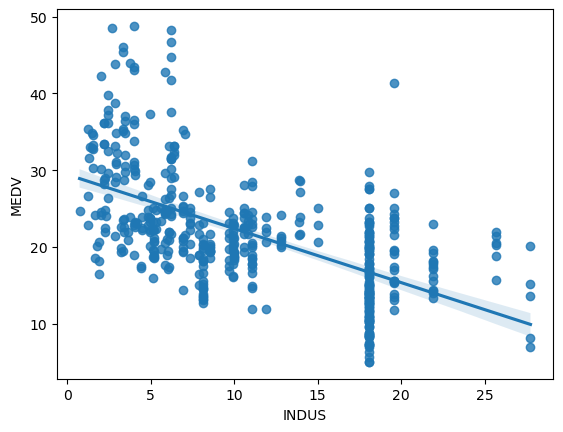

In [551]:
sns.regplot(x = 'INDUS', y = 'MEDV', data = df)
plt.show()

In [553]:
pearson_coef, p_value = stats.pearsonr(df['INDUS'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5957517272076933  with a P-value of P = 2.1209924010585046e-48


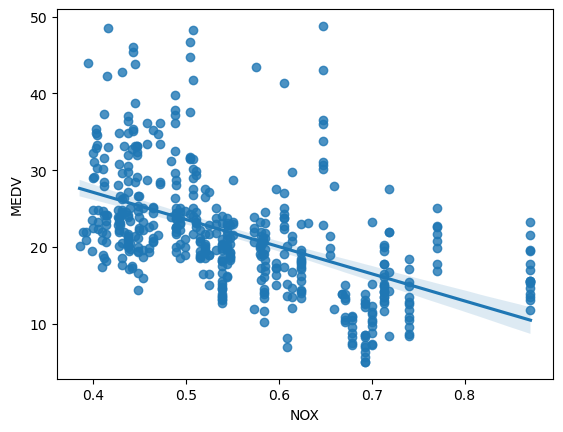

In [555]:
sns.regplot(x = 'NOX', y = 'MEDV', data = df)
plt.show()

In [557]:
pearson_coef, p_value = stats.pearsonr(df['NOX'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5244510312240698  with a P-value of P = 5.6341115604339e-36


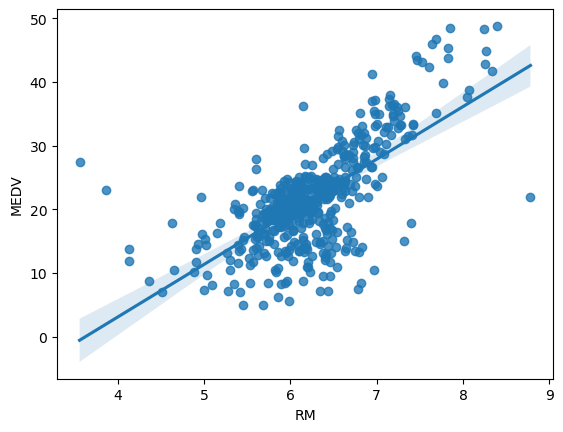

In [559]:
sns.regplot(x = 'RM', y = 'MEDV', data = df)
plt.show()

In [561]:
pearson_coef, p_value = stats.pearsonr(df['RM'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6866343142060234  with a P-value of P = 1.4107579483707213e-69


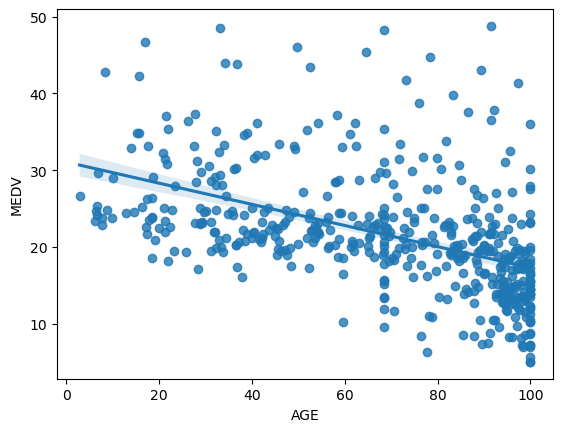

In [563]:
sns.regplot(x = 'AGE', y = 'MEDV', data = df)
plt.show()

In [565]:
pearson_coef, p_value = stats.pearsonr(df['AGE'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.48213290971428513  with a P-value of P = 6.873769531255175e-30


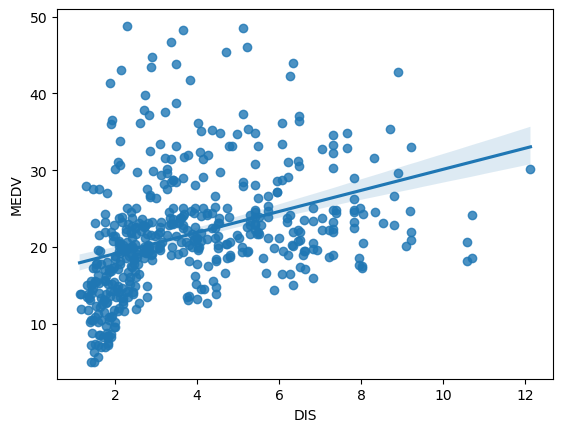

In [567]:
sns.regplot(x = 'DIS', y = 'MEDV', data = df)
plt.show()

In [569]:
pearson_coef, p_value = stats.pearsonr(df['DIS'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.368813184777826  with a P-value of P = 3.1028055881007194e-17


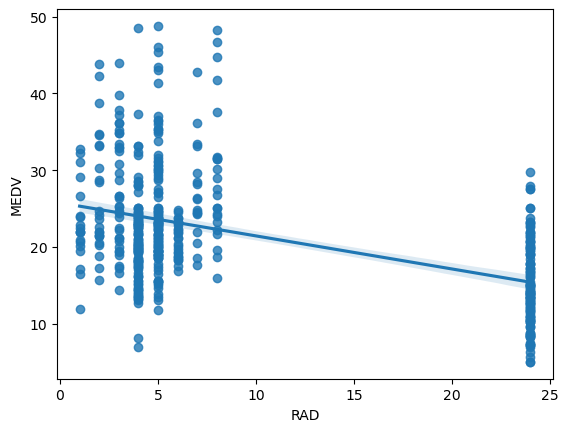

In [571]:
sns.regplot(x = 'RAD', y = 'MEDV', data = df)
plt.show()

In [573]:
pearson_coef, p_value = stats.pearsonr(df['RAD'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.47629559346391637  with a P-value of P = 4.0925279040357154e-29


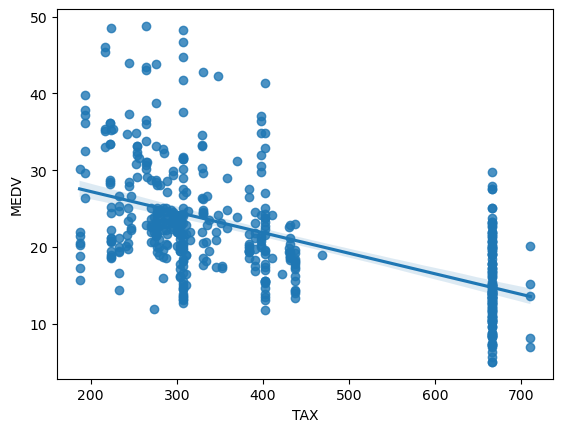

In [575]:
sns.regplot(x = 'TAX', y = 'MEDV', data = df)
plt.show()

In [577]:
pearson_coef, p_value = stats.pearsonr(df['TAX'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5724416727890055  with a P-value of P = 5.309279991054911e-44


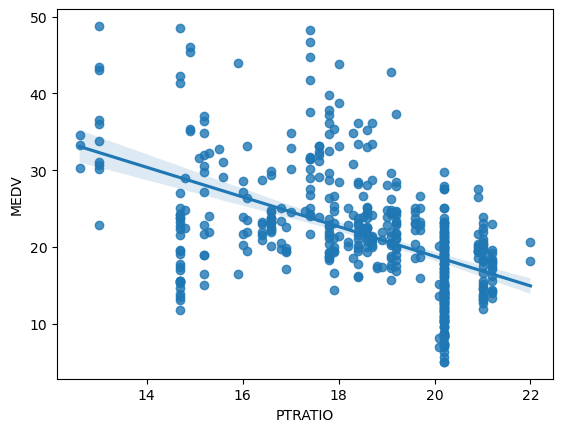

In [579]:
sns.regplot(x = 'PTRATIO', y = 'MEDV', data = df)
plt.show()

In [581]:
pearson_coef, p_value = stats.pearsonr(df['PTRATIO'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.5186410493961904  with a P-value of P = 4.342761486881742e-35


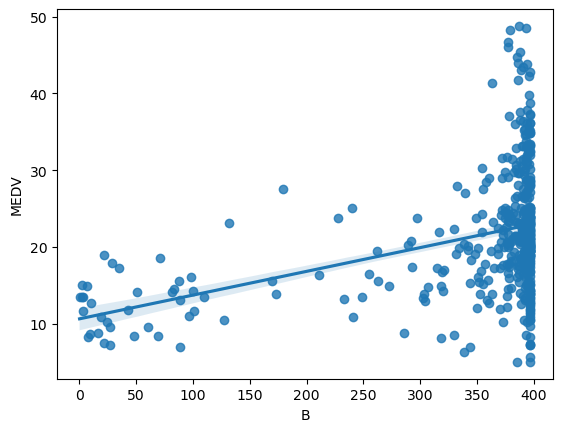

In [583]:
sns.regplot(x = 'B', y = 'MEDV', data = df)
plt.show()

In [585]:
pearson_coef, p_value = stats.pearsonr(df['B'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.36492798027827794  with a P-value of P = 7.003148048347953e-17


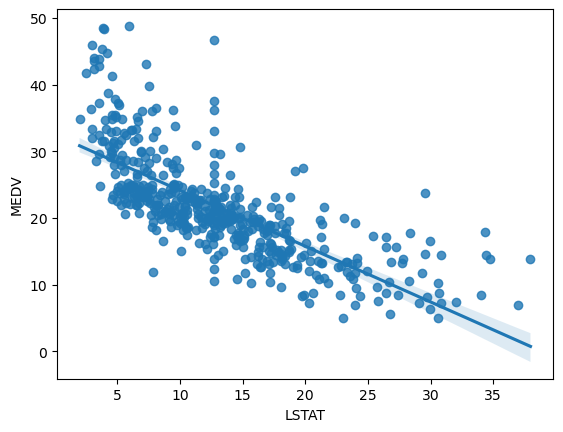

In [587]:
sns.regplot(x = 'LSTAT', y = 'MEDV', data = df)
plt.show()

In [589]:
pearson_coef, p_value = stats.pearsonr(df['LSTAT'], df['MEDV'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is -0.7380958190936451  with a P-value of P = 1.9651564168221526e-85


C:\Users\aaron\AppData\Local\Temp\ipykernel_31256\4082280286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], hist = True)


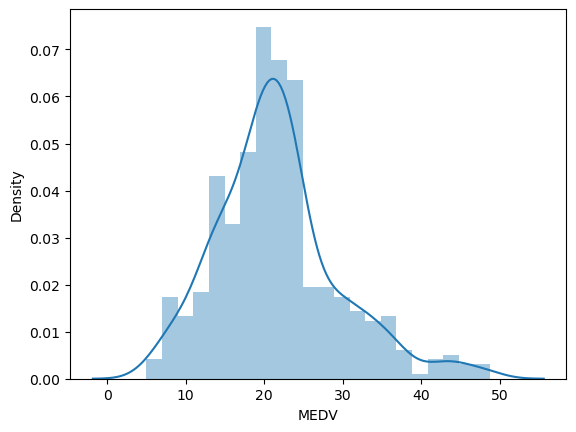

In [591]:
sns.distplot(df['MEDV'], hist = True)
plt.show()

We also see above that MEDV seems to follow a normal distribution which is good for us modelling a regression model

## Fitting the data to models
Now that we've preprocessed our data we look to fit it to some machine learning models, but first we split the data to train and test sets.

In [593]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Due to correlation with MEDV and multicollinearity between predictor variables below are the variables we decide to keep in the model

In [596]:
X = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']]
Y = df['MEDV']

We standardise the X variables first before fitting the models

In [600]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

We split the data into training and testing data, with 10% for testing data

In [603]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size = 0.1)

First we fit the data with linear regression

In [607]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

We convert the coefficients back to the normal feautre space, this helps if we want to understand the effect of the variables in real terms

In [612]:
coef_ =  lr.coef_
intercept_ = lr.intercept_
means_ = scaler.mean_
std_devs_ = np.sqrt(scaler.var_)

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print(coef_original)
print(intercept_original)

[-6.02812749e-02 -2.41192178e-03 -4.88467253e-02  4.61850852e+00
 -1.39480358e-02 -5.67981740e-03 -7.76308516e-01 -3.54216655e-01]
15.716311074017003


In [614]:
y_hat = lr.predict(X_test)

In [616]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_hat)
r2 = r2_score(Y_test, y_hat)
print(mse)
print(r2)

19.82380697717009
0.6629335312602701


We see linear regression gives us a MSE of 19.82 and an R^2 of 0.67

Now we try linear regression with cross validation to try and help reduce variance

In [620]:
from sklearn.model_selection import cross_validate

lr_1 = LinearRegression()
lr_cross = cross_validate(lr_1, X_std, Y, scoring = ('r2', 'neg_mean_squared_error'), return_train_score = True ,cv = 8)
print(lr_cross['train_r2'].mean())
print(np.abs(lr_cross['test_neg_mean_squared_error'].mean()))
print(np.abs(lr_cross['test_neg_mean_squared_error']))

0.7263908389228255
21.60906667260408
[11.39408222  6.95293474 17.9105589  27.79873136 21.62541858 42.75550938
 31.26217995 13.17311826]


We see an increased R^2 which is good but also an increase in average test mse which is not good. We can also see some of the cross validation folds have very low test MSEs but some are very high

Next we just test the cross_val_predict function and still see a higher test mse than the first regression

In [626]:
lr_2 = LinearRegression()
y_hat_cross = cross_val_predict(lr_2, X_std, Y, cv = 8)
print(mean_squared_error(Y,y_hat_cross))

21.558309292219608


We now move onto trying Ridge regression

In [630]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
grid_ridge = GridSearchCV(ridge, parameters, cv = 10, scoring = 'neg_mean_squared_error')

In [632]:
grid_ridge.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000]}],
             scoring='neg_mean_squared_error')

In [634]:
best_ridge = grid_ridge.best_estimator_

In [636]:
y_hat_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(Y_test, y_hat_ridge)
r2_ridge = r2_score(Y_test, y_hat_ridge)
print(mse_ridge)
print(r2_ridge)

19.479220333191343
0.6687925775773853


Using cross validation we select alpha as 10 for our ridge model, and see a slight improvement in our test mse and r^2 values compared to multiple linear regression. It may turn out another value of alpha is better as we don't have a large parameter grid to search here, but since accuracy is not our main aim in this notebook we do not look for this, this is the same case for parameters in most of the models which follow.

Now we look at Lasso regression

In [639]:
from sklearn.linear_model import Lasso
lasso = Lasso()
grid_lasso = GridSearchCV(lasso, parameters, cv = 10, scoring = 'neg_mean_squared_error')
grid_lasso.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000]}],
             scoring='neg_mean_squared_error')

In [641]:
best_lasso = grid_lasso.best_estimator_

In [643]:
y_hat_lasso = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(Y_test, y_hat_lasso)
r2_lasso = r2_score(Y_test, y_hat_lasso)
print(mse_lasso)
print(r2_lasso)

19.395310412924893
0.6702193075969529


This again very slightly improves on the ridge model

These next few blocks are just me experimenting a little with pipelines using lasso

In [665]:
pipeline_lasso = Pipeline([
    #('scaler', StandardScaler()),       # Step 1: Standardize features
    ('lasso', Lasso())       # Step 2: Reduce dimensions to 2 using PCA  # Step 3: K-Nearest Neighbors classifier
])

In [667]:
parameters_lasso_pipe = [{'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]

In [669]:
lasso_pipeline = GridSearchCV(pipeline_lasso, parameters_lasso_pipe, cv = 10, scoring = 'neg_mean_squared_error')

In [671]:
lasso_pipeline.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=Pipeline(steps=[('lasso', Lasso())]),
             param_grid=[{'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                           10000]}],
             scoring='neg_mean_squared_error')

In [673]:
lasso_best = lasso_pipeline.best_estimator_.named_steps['lasso']

In [675]:
lasso_best.coef_

array([-0.44750086,  0.        , -0.29938683,  2.94182468, -0.31275611,
       -0.97028153, -1.56476062, -2.47865164])

Now we have a look at decision trees

In [682]:
from sklearn.tree import DecisionTreeRegressor

tree_r = DecisionTreeRegressor(max_depth = 4)

In [684]:
tree_r.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4)

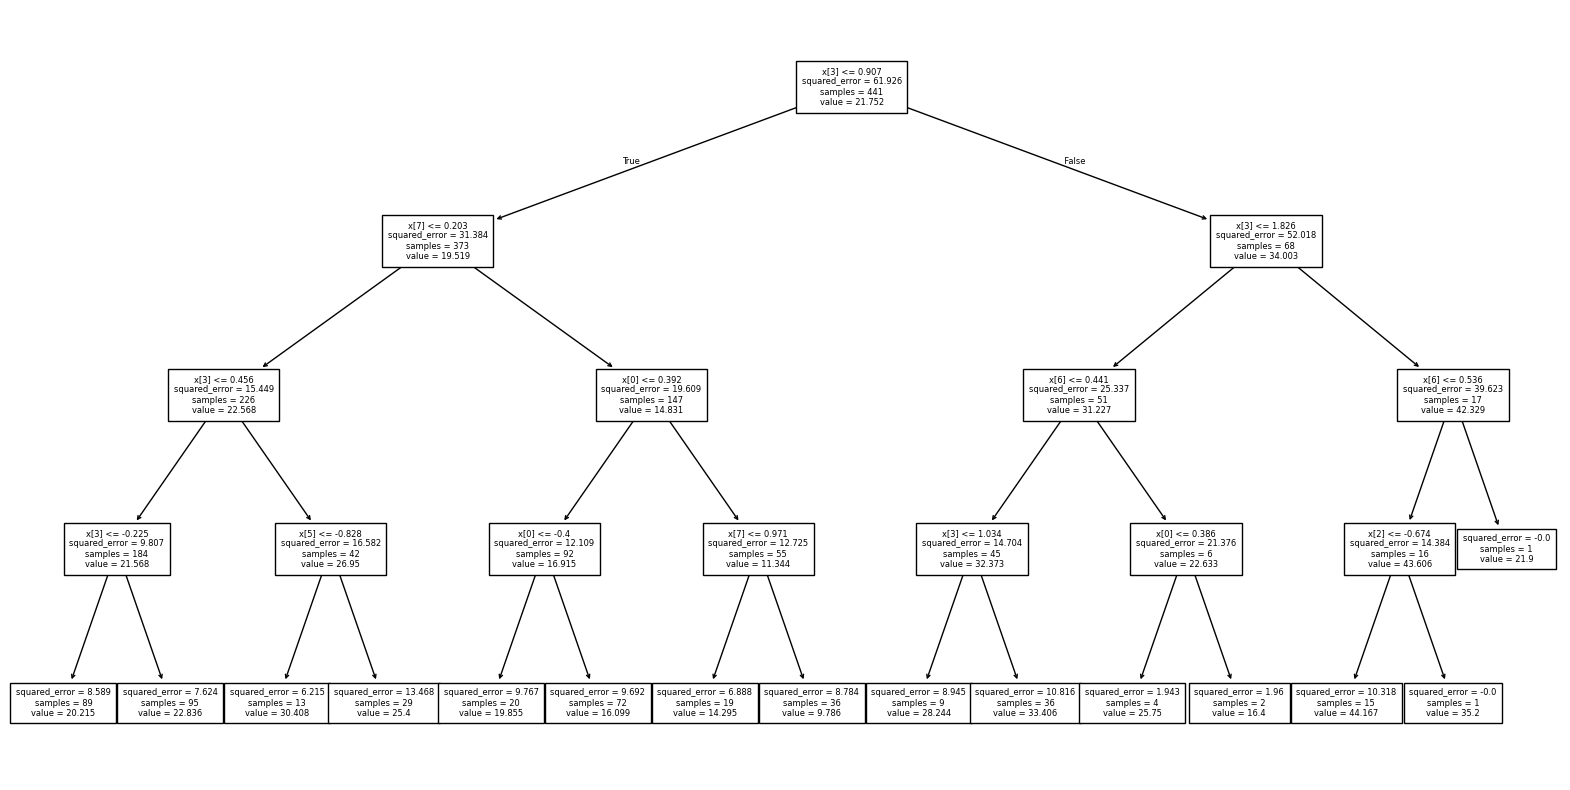

In [688]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,10))
plot_tree(tree_r, fontsize = 6)
plt.show()

In [690]:
y_hat_tree = tree_r.predict(X_test)
mse_tree = mean_squared_error(y_hat_tree, Y_test)
print(mse_tree)
r2_tree = r2_score(y_hat_tree, Y_test)
print(r2_tree)

9.685943845706918
0.8446939117355816


We now see a very large improvement in the test mse and r^2 values when using this simple decision tree

Next we move onto trying random forests and boosting

In [693]:
from sklearn.ensemble import RandomForestRegressor

In [696]:
n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, max_depth = 5)

In [698]:
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=5)

In [700]:
y_hat_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_hat_rf, Y_test)
print(mse_rf)
r2_rf = rf.score(X_train, Y_train)
print(r2_rf)

8.016224725460532
0.9124154295618975


As expected we now see a further increase on the basic decision tree's results

In [703]:
from xgboost import XGBRegressor

In [705]:
xgb = XGBRegressor(n_estimators=n_estimators, max_depth = 5)

In [707]:
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [709]:
y_hat_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_hat_xgb, Y_test)
print(mse_xgb)
r2_xgb = xgb.score(X_train, Y_train)
print(r2_xgb)

7.3121908986157
0.9997104297530508


And once again with the boosting model we see an even further improvement on the random forest's results

Finally we have a look at K Nearest Neighbours regression

In [712]:
from sklearn.neighbors import KNeighborsRegressor

In [714]:
knn = KNeighborsRegressor()

In [716]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14]}
knn_cross = GridSearchCV(knn, params)

In [723]:
knn_cross.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [729]:
y_hat_knn = knn_cross.predict(X_test)
mse_knn = mean_squared_error(y_hat_knn, Y_test)
print(mse_knn)
r2_knn = knn_cross.score(X_train, Y_train)
print(r2_knn)

10.175198412698412
0.8650628808676245


Here we see KNN does not outperform boosting and random forests but does largely improve on the results of linear, ridge and lasso regression.

To conclude, throughout this notebook we began by cleaning and preprocessing the data, by correcting any NAN values and removing variables which are not relevant to the response. After this we split the data into training and testing sets and then fit it to a variety of different machine learning models and for this data, boosting gave us the best results. However, prediction accuracy was not the primary goal of this notebook, we just wanted to explore the different methods and practice applying these machine learning methods.